## ITEC 6720 : Assignment #5
Chapter 6 - Introduction to Seaborn 
Rachel Buchanan

In [1]:
# setup
#
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

In [2]:
# categorical data 
#
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    'parsed_place == "Indonesia" and tsunami and mag == 7.5'
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<AxesSubplot:xlabel='magType', ylabel='mag'>

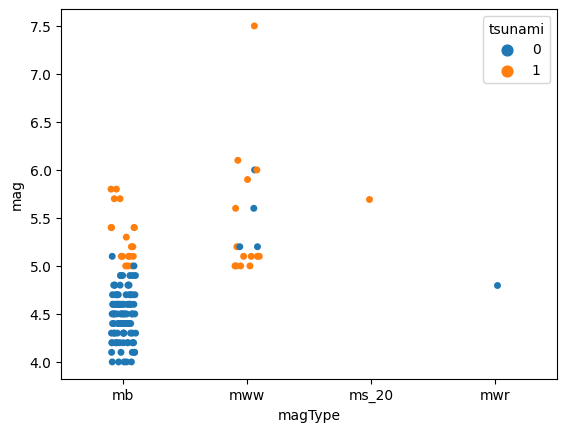

In [3]:
# stripplot() - individual data points across an axis - similar to scatter plot
# 
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

<AxesSubplot:xlabel='magType', ylabel='mag'>

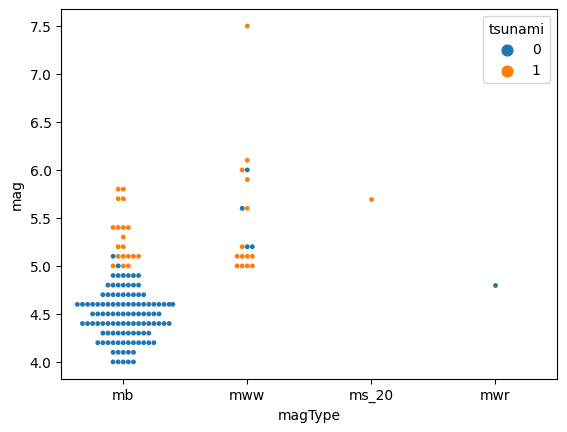

In [4]:
# swarmplot() - reduces overlap giving insight to distribution
#
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
# point size
#
    size=3.5 
)

Text(0.5, 1.0, 'Comparing Earthquake Magnitude by magType')

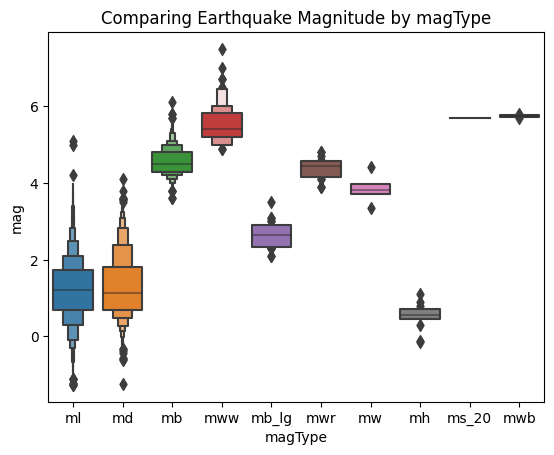

In [6]:
# boxenplot() - enhanced box plot through seaborn showing additional quantiles for dist shape
#
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.title('Comparing Earthquake Magnitude by magType')

Text(0.5, 1.0, 'Comparing Earthquake Magnitude by magType')

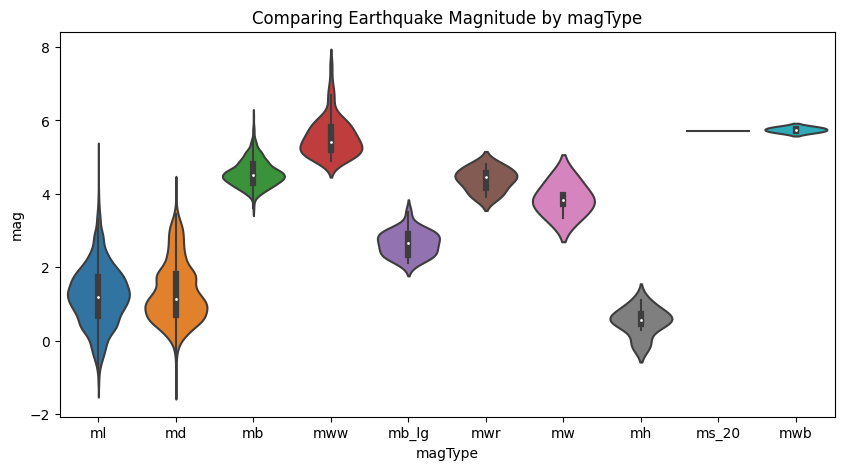

In [7]:
# violin plot - comines kernal density est and box plot
#
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
# violins = width
    ax=axes, scale='width' 
)
plt.title('Comparing Earthquake Magnitude by magType')

## Correlations & Heatmaps

<AxesSubplot:>

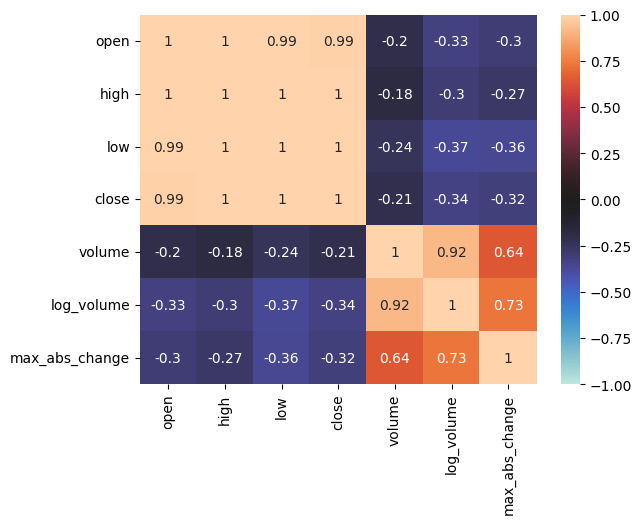

In [9]:
# heatmaps - easier way to produce visualization
#
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
# center = 0 (no correlation) 
# set min max bounds 
# correlation coefficients notated by annot = true
    annot=True, center=0, vmin=-1, vmax=1
)

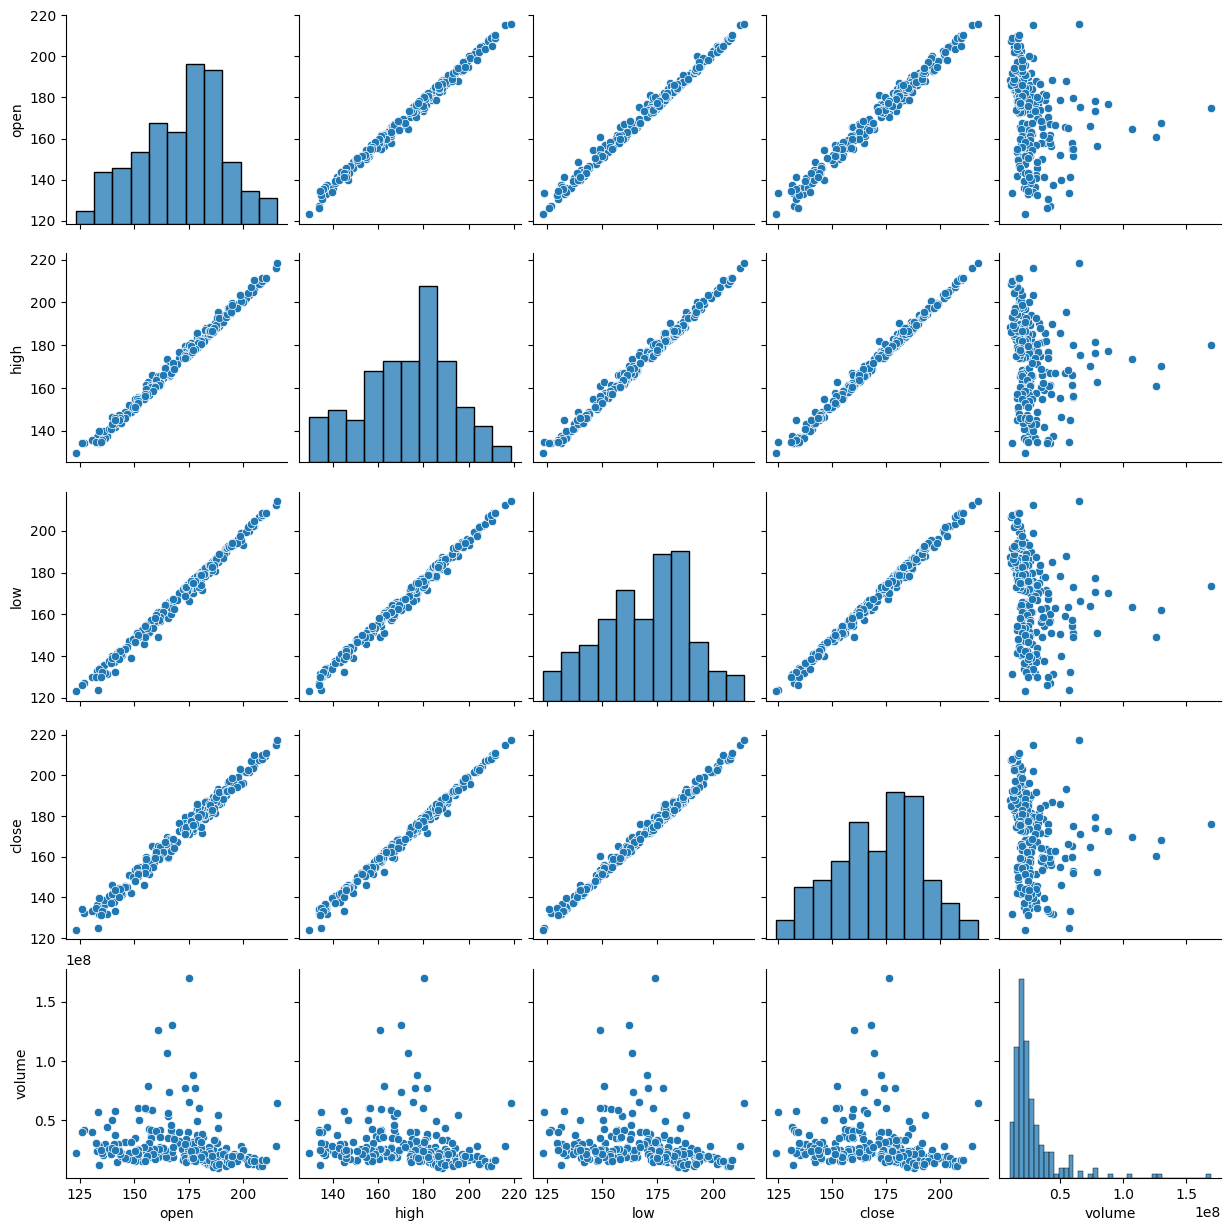

In [10]:
# pair plot 
#
sns.pairplot(fb)

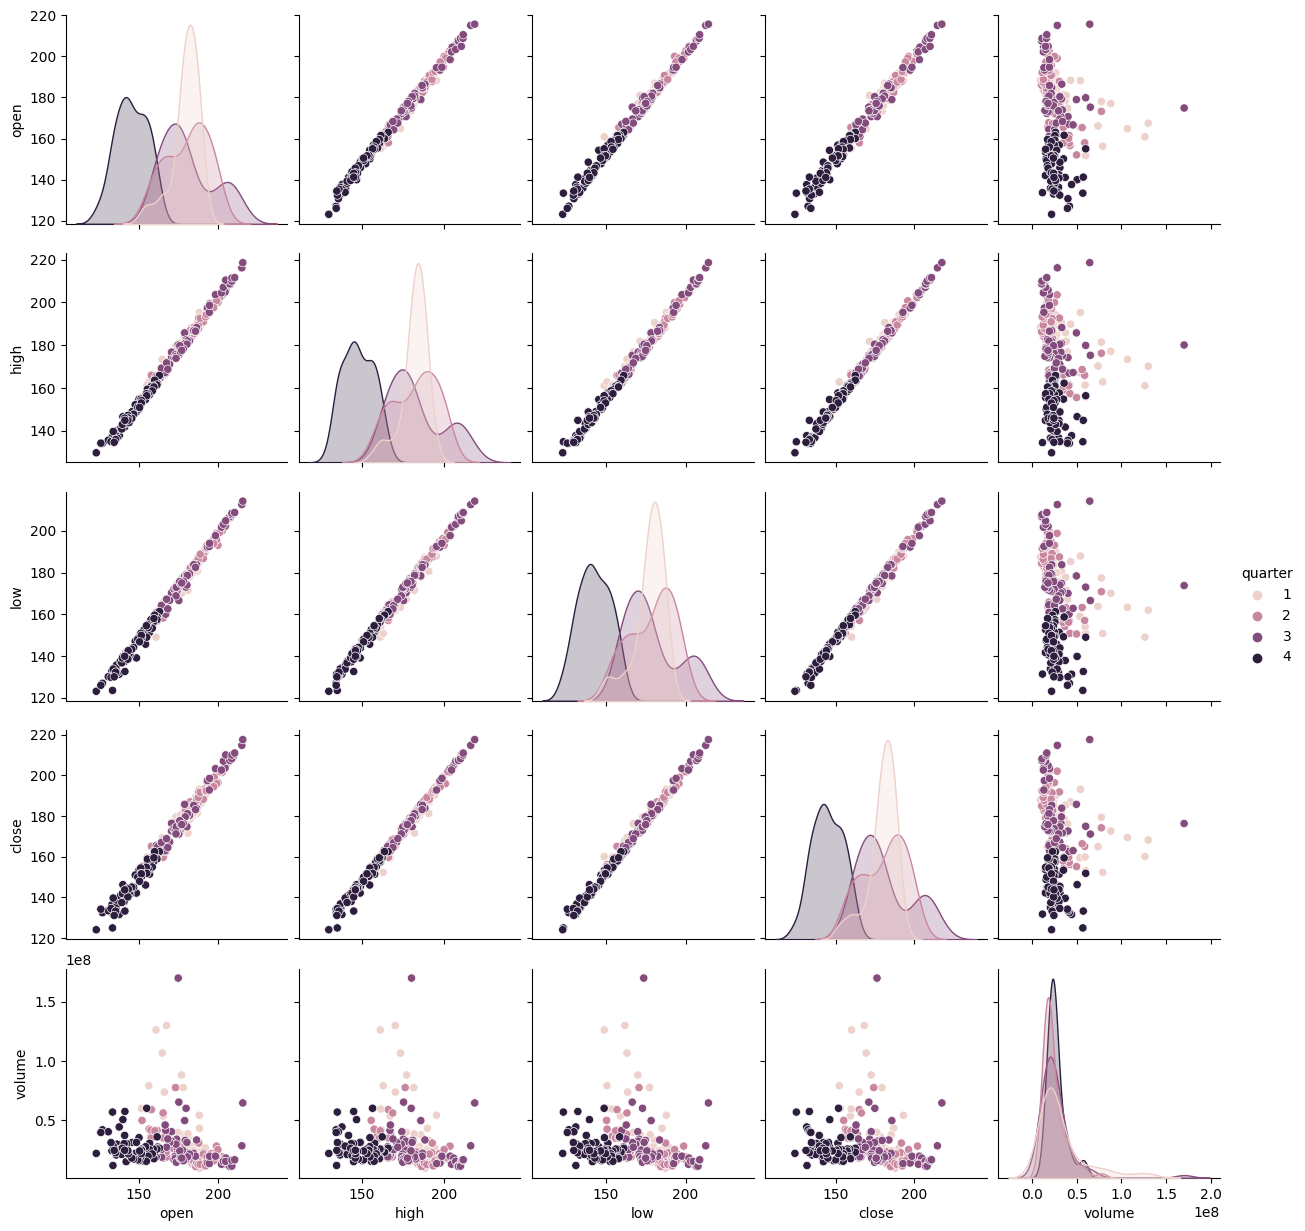

In [11]:
# pair plot hue - quarter : specify what to show over diagonal 
#
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

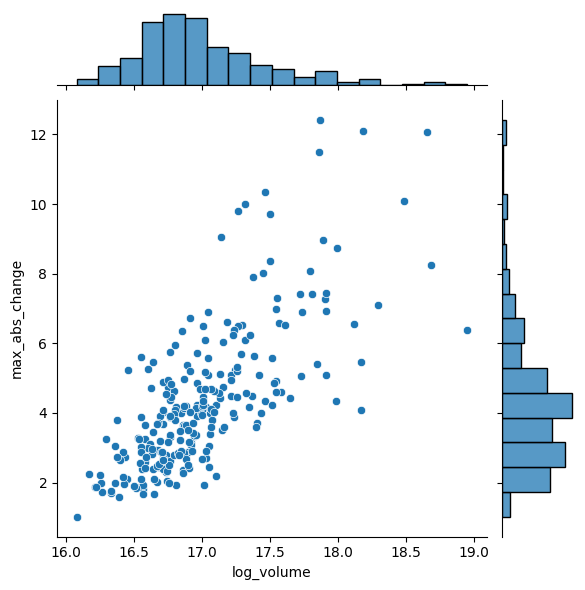

In [12]:
# joint plot - compare only two variables 
#
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

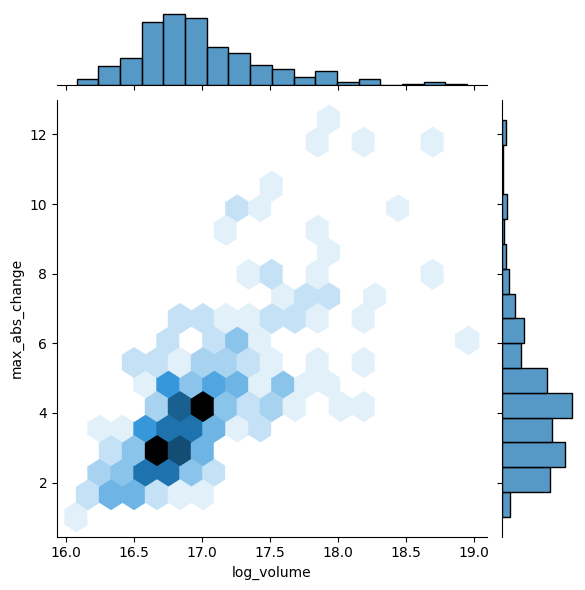

In [13]:
# joint plot & hexbin - for overlap distinguishing 
#
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

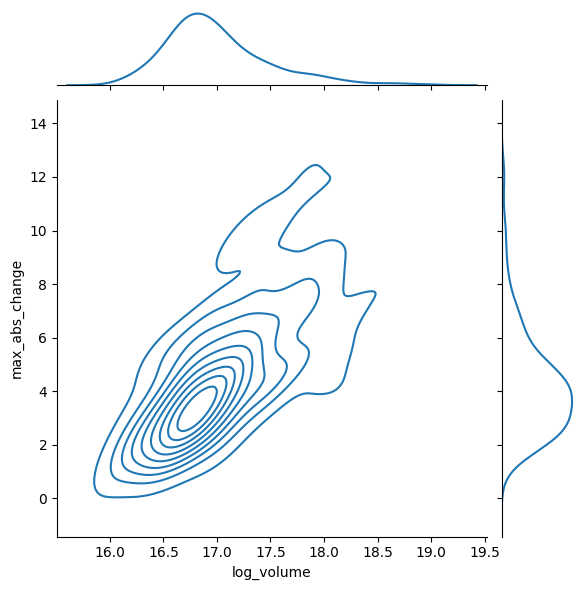

In [14]:
# contour plot - represents joint density estimate with KDE for each variable
#
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

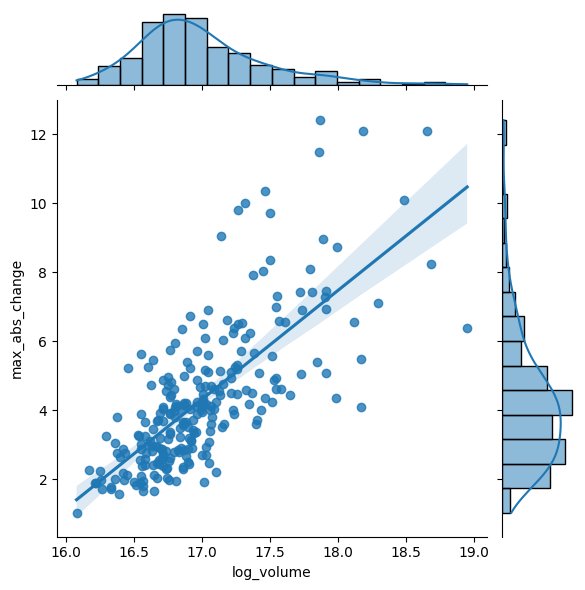

In [15]:
# plot regressions 
#
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Text(468.01587301587307, 0.5, 'residuals')

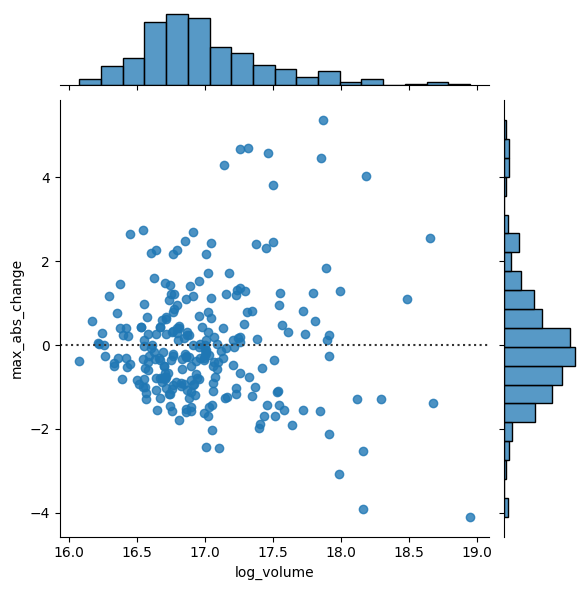

In [16]:
# relationships checked by residuals 
# residuals are observed values - values predicted = using regression line
#
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
# adjust y-axis label
#
plt.ylabel('residuals')

In [17]:
# regression plots
#
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [18]:
# permutations and combinations 
#
import itertools

In [19]:
iterator = itertools.repeat("I'm an iterator", 1)
#
for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [20]:
iterable = list(itertools.repeat("I'm an iterable", 1))
#
for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


In [21]:
from viz import reg_resid_plots
reg_resid_plots??

Signature: reg_resid_plots(data)
Source:   
def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    
    Parameters:
        - data: A `pandas.DataFrame`

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes
File:      c:\users\rache\documents\itec 6720\book\ch_06\viz.py
Type:      function

[<AxesSubplot:xlabel='log_volume', ylabel='max_abs_change'>,
 <AxesSubplot:xlabel='log_volume', ylabel='residuals'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='log_volume'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='residuals'>]

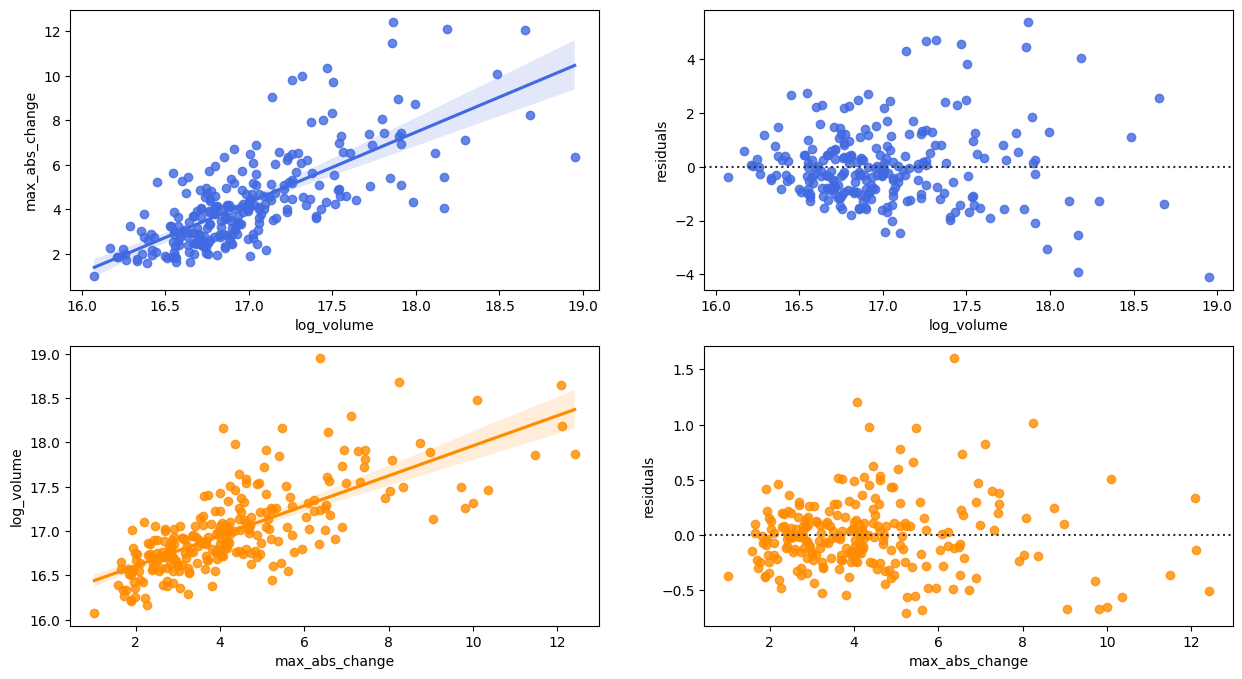

In [22]:
from viz import reg_resid_plots
reg_resid_plots(fb_reg_data)

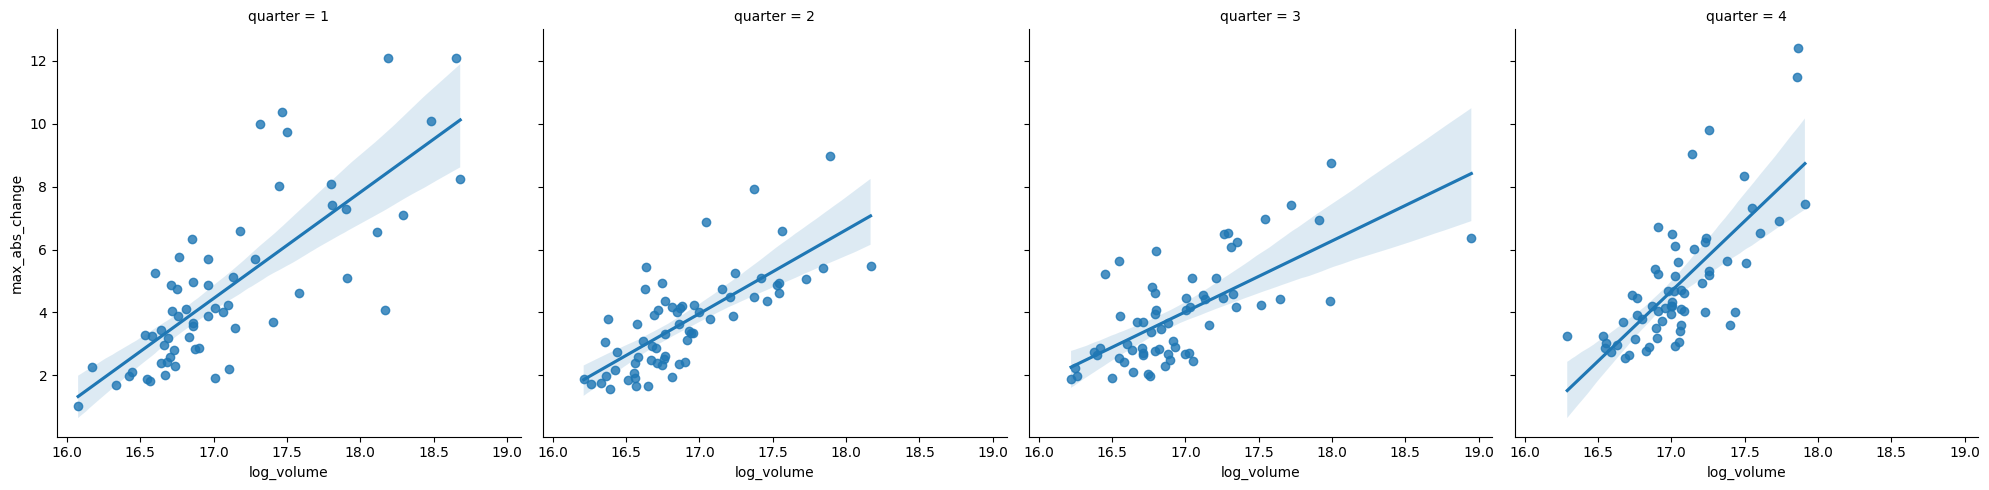

In [23]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

## Faceting 

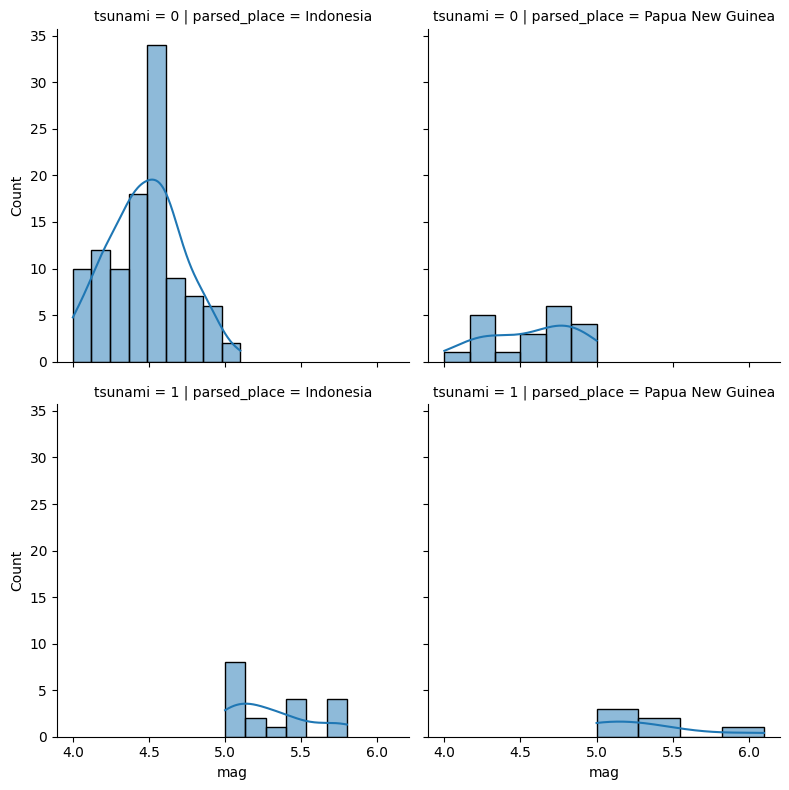

In [24]:
# faceting - plot subsets of data across subplots 
#
g = sns.FacetGrid(
    quakes.query(
        'parsed_place.isin(["Indonesia", "Papua New Guinea"]) '
        'and magType == "mb"'
    ),
    row='tsunami',
    col='parsed_place',
    height=4
)
g = g.map(sns.histplot, 'mag', kde=True)